In [3]:
import pandas as pd
import numpy as np
ride_sharing = pd.read_csv("ride_sharing_new.csv")
ride_sharing.head(5)
#ride_sharing.columns

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [2]:
#########################################################################
####### Cleaning data - data type constraints | numeric to category #####
#########################################################################

# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

In [3]:
#########################################################################
####### Cleaning data - data type constraints | string to numeric   #####
#########################################################################

# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())



         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


In [4]:
#########################################################################
####### Cleaning data - data range constraints | Set a custom max #######
#########################################################################

#ride_sharing['duration_time'].max()   #max is 1372
ride_sharing1 = ride_sharing

OutOfRange = ride_sharing1[ride_sharing1['duration_time'] >= 1000]
print(OutOfRange['duration_time'])

ride_sharing1.loc[ride_sharing1['duration_time'] >= 1000, 'duration_time'] = 1000
assert ride_sharing1['duration_time'].max() <=1000


#########################################################################
####### Cleaning data - data range constraints | Drop data        #######
#########################################################################
ride_sharing2 = ride_sharing[ride_sharing['duration_time'] < 1000]
assert ride_sharing2['duration_time'].max() < 1000

### or ###
ride_sharing3 = ride_sharing
ride_sharing3.drop(ride_sharing3[ride_sharing['duration_time'] >= 1000].index, inplace=True)
assert ride_sharing3['duration_time'].max() < 1000




5998     1372
7147     1333
22579    1289
24244    1047
Name: duration_time, dtype: int64


In [5]:
#########################################################################
####### Cleaning data - uniqueness constraints | Duplicate values #######
#########################################################################
ride_sharing4 = ride_sharing
#complete duplicate
ride_sharing4.iloc[2]=ride_sharing.iloc[1]
ride_sharing4.iloc[3]=ride_sharing.iloc[1]

duplicates = ride_sharing4.duplicated(subset=['duration','station_A_id','station_A_name','station_B_id','station_B_name','user_type','user_birth_year','user_gender','bike_id'],keep=False)

duplicated_rides = ride_sharing4[duplicates].sort_values('bike_id')
print(duplicated_rides[['duration','station_A_id','station_B_id','user_birth_year','bike_id']])

# Drop complete duplicates from ride_sharing
ride_drop = duplicated_rides.drop_duplicates()

# For incomplete duplicates from ride_sharing
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_drop.groupby('bike_id').agg(statistics).reset_index()
print(ride_unique[['bike_id','user_birth_year','duration_time']])

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0



         duration  station_A_id  station_B_id  user_birth_year  bike_id
9696   17 minutes            22           102             1961      492
15217  17 minutes            22           102             1961      492
566     9 minutes            81            81             1993     1225
604     9 minutes            81            81             1993     1225
7610   10 minutes            30             6             1967     4442
18303  10 minutes            30             6             1967     4442
9724    4 minutes            21           343             1993     5034
20170   4 minutes            21           343             1993     5034
1      24 minutes             3           118             1965     5193
2      24 minutes             3           118             1965     5193
3      24 minutes             3           118             1965     5193
   bike_id  user_birth_year  duration_time
0      492             1961           17.0
1     1225             1993            9.0
2     4

In [46]:
airlines = pd.read_csv("airlines_final.csv")
print(airlines.head(5))
airlines.columns

   Unnamed: 0    id        day      airline        destination    dest_region  \
0           0  1351    Tuesday  UNITED INTL             KANSAI           Asia   
1           1   373     Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2           2  2820   Thursday        DELTA        LOS ANGELES        West US   
3           3  1157    Tuesday    SOUTHWEST        LOS ANGELES        West US   
4           4  2992  Wednesday     AMERICAN              MIAMI        East US   

  dest_size boarding_area   dept_time  wait_min     cleanliness  \
0       Hub  Gates 91-102  2018-12-31     115.0           Clean   
1     Small   Gates 50-59  2018-12-31     135.0           Clean   
2       Hub   Gates 40-48  2018-12-31      70.0         Average   
3       Hub   Gates 20-39  2018-12-31     190.0           Clean   
4       Hub   Gates 50-59  2018-12-31     559.0  Somewhat clean   

          safety        satisfaction  
0        Neutral      Very satisfied  
1      Very safe      Very satis

Index(['Unnamed: 0', 'id', 'day', 'airline', 'destination', 'dest_region',
       'dest_size', 'boarding_area', 'dept_time', 'wait_min', 'cleanliness',
       'safety', 'satisfaction'],
      dtype='object')

In [47]:
#Create dataframe categories :
#    cleanliness           safety          satisfaction
#0           Clean          Neutral        Very satisfied
#1         Average        Very safe               Neutral
#2  Somewhat clean    Somewhat safe    Somewhat satisfied
#3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
#4           Dirty  Somewhat unsafe      Very unsatisfied

data = {'cleanliness': ['Clean', 'Average', 'Somewhat clean','Somewhat dirty', 'Dirty'],
              'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe','Somewhat unsafe'],
              'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied','Very unsatisfied']}
# Create DataFrame
categories = pd.DataFrame(data)
print(categories)

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied


In [48]:
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

#print(airlines.head(6))

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [49]:
#########################################################################
####### Cleaning data - membership constraints | finding consistency ####
#########################################################################
# change rows 4-18-100 to cleanliness = Unaceptable
airlines.iloc[[4,18,100],10] ='Unaceptable'
#print(airlines.iloc[[4,18,100]])

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

#Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
#print(airlines[~cat_clean_rows])

     Unnamed: 0    id        day    airline destination dest_region dest_size  \
4             4  2992  Wednesday   AMERICAN       MIAMI     East US       Hub   
18           19   803     Sunday     ALASKA   BALTIMORE     East US    Medium   
100         113   340  Wednesday  SOUTHWEST     PHOENIX     West US       Hub   

    boarding_area   dept_time  wait_min  cleanliness         safety  \
4     Gates 50-59  2018-12-31     559.0  Unaceptable      Very safe   
18    Gates 50-59  2018-12-31     155.0  Unaceptable      Very safe   
100   Gates 20-39  2018-12-31     240.0  Unaceptable  Somewhat safe   

           satisfaction  
4    Somewhat satsified  
18       Very satisfied  
100  Somewhat satsified  


In [56]:
#########################################################################
####### Cleaning data - Inconsistent categories                      ####
#########################################################################
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

#dest_region has inconsistent values due to capitalization and has one value that needs to be remapped
#dest_size has only inconsistent values due to trailing spaces.

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

#########################################################################
####### Cleaning data - Remapping categories                         ####
#########################################################################
# create two new categorical variables
#wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
#day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

print(airlines['wait_type'].head(5),airlines['wait_min'].head(5),airlines['day_week'].head(5),airlines['day'].head(5) )


['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']
0    medium
1    medium
2    medium
3      long
4      long
Name: wait_type, dtype: category
Categories (3, object): ['short' < 'medium' < 'long'] 0    115.0
1    135.0
2     70.0
3    190.0
4    559.0
Name: wait_min, dtype: float64 0    weekday
1    weekday
2    weekday
3    weekday
4    weekday
Name: day_week, dtype: object 0      Tuesday
1       Friday
2     Thursday
3      Tuesday
4    Wednesday
Name: day, dtype: object


In [86]:
#########################################################################
####### Cleaning data  text -                                        ####
#########################################################################

data1 = {'Full name': ['Noelani A. Gray', 'Myles Z. Gomez', 'Gil B. Silva','Prescott D. Hardin',
                      'Benedict G. Valdez','Reece M. Andrews', 'Haifa E. Keith','Hedley I. Logan','Jack W. Carillo'],
              'Phone number': ['001-702-397-5143', '001-329-485-0540', '001-195-492-2338',
                               '+1-297-996-4904','001-969-820-3356','4138','001-536-175-8444',
                              '001-681-552-1823','001-910-323-5265']}
# Create DataFrame
phones = pd.DataFrame(data1)
print(phones)

#line3 Inconsistent data format
#line5 Length violation
# Replace "+" with "00"
phones['Phone number'] = phones['Phone number'].str.replace("+","00")
phones['Phone number'] = phones['Phone number'].str.replace("-","")
digits = phones['Phone number'].str.len()
phones.loc[digits < 10,'Phone number'] = np.nan
print('')
print(phones)

#assert minimum phone number length is 10
sanity_check = phones['Phone number'].str.len()
assert sanity_check.min() >= 10
#assert all numbers do not have '+' or '-'
#assert phones['Phone number'].str.contains("+|-").any() == False

#######################################################################################
####### Cleaning data  text - regular expression for dificult string cleaning tasks  ##                                     ####
#######################################################################################
#Phone numbers can contain a range of symbols
#from + sign, dashes, parenthesis => use regular expression
data2 = {'Full name': ['Noelani A. Gray', 'Myles Z. Gomez', 'Gil B. Silva','Prescott D. Hardin',
                      'Benedict G. Valdez'],
              'Phone number': ['+(01706)-25891', '+0500-571437', '+0800-1111',
                               '+07058-879063','+(016977)-8424']}
# Create DataFrame
phonesss = pd.DataFrame(data2)
print('')
print(phonesss)

#replace anything that is not a digit with nothing. 
phonesss['Phone number'] = phonesss['Phone number'].str.replace(r'\D+','')
print('')
print(phonesss)


            Full name      Phone number
0     Noelani A. Gray  001-702-397-5143
1      Myles Z. Gomez  001-329-485-0540
2        Gil B. Silva  001-195-492-2338
3  Prescott D. Hardin   +1-297-996-4904
4  Benedict G. Valdez  001-969-820-3356
5    Reece M. Andrews              4138
6      Haifa E. Keith  001-536-175-8444
7     Hedley I. Logan  001-681-552-1823
8     Jack W. Carillo  001-910-323-5265

            Full name   Phone number
0     Noelani A. Gray  0017023975143
1      Myles Z. Gomez  0013294850540
2        Gil B. Silva  0011954922338
3  Prescott D. Hardin  0012979964904
4  Benedict G. Valdez  0019698203356
5    Reece M. Andrews            NaN
6      Haifa E. Keith  0015361758444
7     Hedley I. Logan  0016815521823
8     Jack W. Carillo  0019103235265

            Full name    Phone number
0     Noelani A. Gray  +(01706)-25891
1      Myles Z. Gomez    +0500-571437
2        Gil B. Silva      +0800-1111
3  Prescott D. Hardin   +07058-879063
4  Benedict G. Valdez  +(016977)-8424


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_32585/2612244834.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phones['Phone number'] = phones['Phone number'].str.replace("+","00")
/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_32585/2612244834.py:45: FutureWarning: The default value of regex will change from True to False in a future version.
  phonesss['Phone number'] = phonesss['Phone number'].str.replace(r'\D+','')


In [17]:
#########################################################################
####### Cleaning data -  Uniformity  -  Uniform currency             ####
#########################################################################

data3 = {'cust_id': ['8C35540A', 'D5536652', 'A631984D','93F2F951','DE0A0882'],
         'acct_amount': ['44244.71', '86506.85', '77799.33','93875.24','99998.35'],
         'acct_cur' : ['dollar', 'dollar', 'dollar','euro','euro'],
         'inv_amount' : ['35500.50', '81921.86', '46412.27','76563.35','18669.01'],
         'account_opened' : ['03-05-18', '21-01-18', '26-01-18','21-08-17','05-06-17'],
         'last_transaction' : ['30-09-19', '14-01-19', '06-10-19','10-07-19','15-01-19'],
        }
# Create DataFrame
banking = pd.DataFrame(data3)
print(banking)

#print(banking.dtypes)
banking['acct_amount'] = banking['acct_amount'].astype('float')
banking['inv_amount'] = banking['inv_amount'].astype('float')
#print(banking.dtypes)

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'
print(banking)


    cust_id acct_amount acct_cur inv_amount account_opened last_transaction
0  8C35540A    44244.71   dollar   35500.50       03-05-18         30-09-19
1  D5536652    86506.85   dollar   81921.86       21-01-18         14-01-19
2  A631984D    77799.33   dollar   46412.27       26-01-18         06-10-19
3  93F2F951    93875.24     euro   76563.35       21-08-17         10-07-19
4  DE0A0882    99998.35     euro   18669.01       05-06-17         15-01-19
    cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction
0  8C35540A    44244.710   dollar    35500.50       03-05-18         30-09-19
1  D5536652    86506.850   dollar    81921.86       21-01-18         14-01-19
2  A631984D    77799.330   dollar    46412.27       26-01-18         06-10-19
3  93F2F951   103262.764   dollar    76563.35       21-08-17         10-07-19
4  DE0A0882   109998.185   dollar    18669.01       05-06-17         15-01-19


In [32]:
#########################################################################
####### Cleaning data -  Uniformity  -  Uniform dates                ####
#########################################################################
# how customers have been investing their money given the size of their account over each year
#since this data was consolidated from multiple sources, all dates are of the same format

banking['account_opened'][0] = '2018-03-05'
banking['account_opened'][2] =  'January 26, 2018' 
banking['account_opened'][3] = '21-14-17' 

# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

#a simple .groupby() will show how accounts are opened on a yearly


0    2018-03-05 00:00:00
1    2018-01-21 00:00:00
2    2018-01-26 00:00:00
3               21-14-17
4    2017-05-06 00:00:00
Name: account_opened, dtype: object
0    2018
1    2018
2    2018
3     NaN
4    2017
Name: acct_year, dtype: object


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_66503/3057485862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking['account_opened'][0] = '2018-03-05'
/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_66503/3057485862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking['account_opened'][2] =  'January 26, 2018'
/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_66503/3057485862.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [48]:
#########################################################################
####### Cleaning data -  Cross validation                            ####
#########################################################################
import datetime as dt

banking['fund_A'] = ['35500.50', '81921.86', '46412.27','76563.35','18669.01']
banking['fund_B'] = ['1', '0', '0','0','0']
banking['fund_C'] = ['0', '0', '0','0','0']
banking['fund_D'] = ['0', '0', '0','0','0']
#print(banking)

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
print(inconsistent_inv)
print('_________________________________')

banking['age'] = [61, 21, 33, 38, 39]
banking['birth_date'] = ['1962-06-09', '2002-12-16', '1990-09-12','1985-11-03','1990-05-17']
banking['birth_date'] = banking['birth_date'].astype('datetime64[ns]')

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
print(inconsistent_ages)

Number of inconsistent investments:  1
    cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction  \
0  8C35540A     44244.71   dollar     35500.5     2018-03-05         30-09-19   

  acct_year    fund_A fund_B fund_C fund_D  age birth_date  
0      2018  35500.50      1      0      0   61 1962-06-09  
_________________________________
Number of inconsistent ages:  1
    cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction  \
4  DE0A0882   109998.185   dollar    18669.01     2017-05-06         15-01-19   

  acct_year    fund_A fund_B fund_C fund_D  age birth_date  
4      2017  18669.01      0      0      0   39 1990-05-17  


cust_id             0
acct_amount         0
acct_cur            0
inv_amount          0
account_opened      1
last_transaction    0
acct_year           1
fund_A              0
fund_B              0
fund_C              0
fund_D              0
age                 0
birth_date          0
dtype: int64


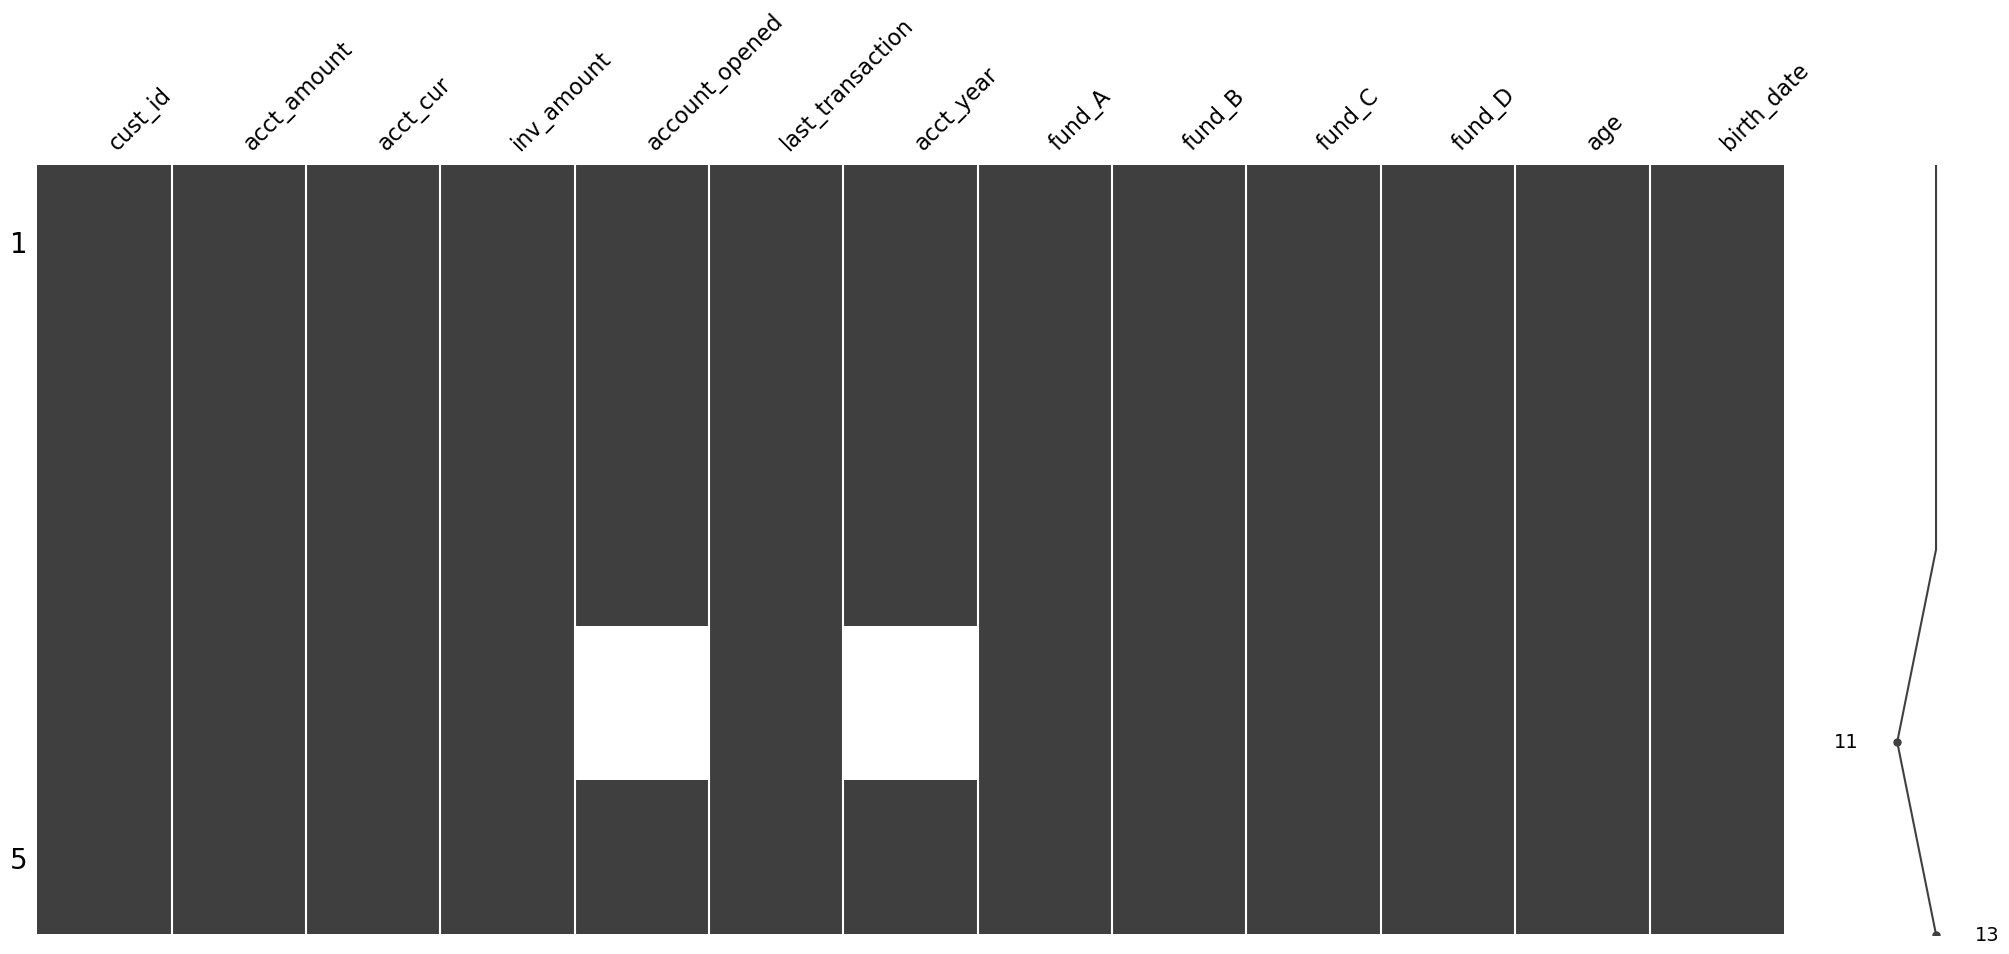

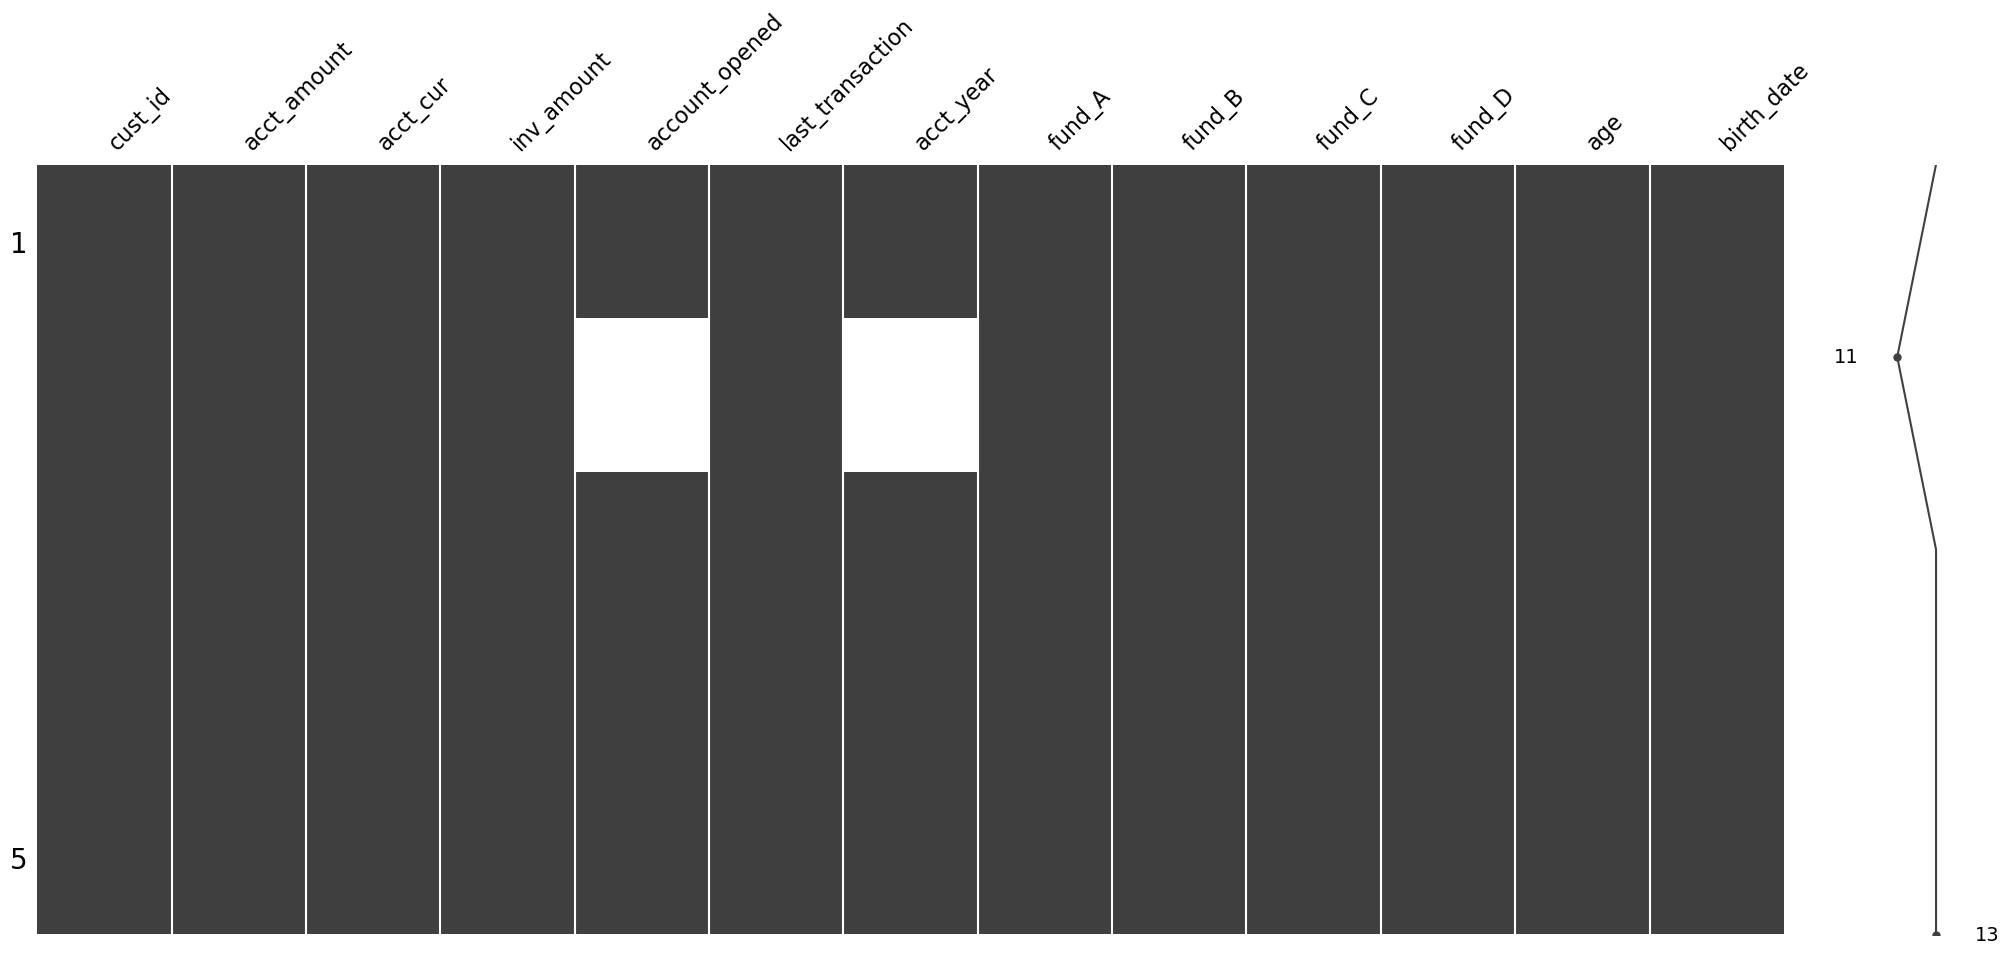

In [64]:
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()


In [20]:
#########################################################################
####### Cleaning data -  string similarity                           ####
#########################################################################
import pandas as pd  
data4 = {'rest_name': ['arnie morton  s of chicago', 'art  s delicatessen', 'campanile','fenix','grill on the alley'],
         'rest_addr': ['435 s. la cienega blv .', '2224 ventura blvd.', '624 s. la brea ave.',
                       '8358 sunset blvd. west','99998.35'],
         'city' : ['los angeles', 'studio city', 'los angeles','hollywood','los angeles'],
         'phone' : ['3102461501', '8187621221', '2139381447','2138486677','3102760615'],
         'cuisine_type' : ['america', 'merican', 'amurican','americen','americann']
        }
# Create DataFrame
restaurant = pd.DataFrame(data4)
print(restaurant)

# Import process from thefuzz
!pip install thefuzz
!pip install thefuzz[speedup]
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurant['cuisine_type'].unique()
# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

###when comparing a string with an array of strings using process.extract()         ####
###the output is a list of tuples (closest match, similarity score, index of match) ####
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('american', restaurant['cuisine_type'], limit=len(restaurant.cuisine_type))

# Inspect the first 5 matches
print(matches[0:5])

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurant.loc[restaurant['cuisine_type'] == match[0], 'cuisine_type'] = 'american'
    
print(restaurant['cuisine_type'])

#### from a list containing the correct cuisine types ###
#### ####so your cuisine types are properly mapped    ###
#########################################################
categories = pd.DataFrame({'cat_name': ['italian', 'asian', 'american']})
print(categories)
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurant['cuisine_type'], limit=len(restaurant.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurant.loc[restaurant['cuisine_type'] == match[0]] = cuisine

print(restaurant['cuisine_type'].unique())


                    rest_name                rest_addr         city  \
0  arnie morton  s of chicago  435 s. la cienega blv .  los angeles   
1         art  s delicatessen       2224 ventura blvd.  studio city   
2                   campanile      624 s. la brea ave.  los angeles   
3                       fenix   8358 sunset blvd. west    hollywood   
4          grill on the alley                 99998.35  los angeles   

        phone cuisine_type  
0  3102461501      america  
1  8187621221      merican  
2  2139381447     amurican  
3  2138486677     americen  
4  3102760615    americann  
[('americann', 94), ('america', 93), ('merican', 93), ('amurican', 88), ('americen', 88)]
[('americann', 94, 4), ('america', 93, 0), ('merican', 93, 1), ('amurican', 88, 2), ('americen', 88, 3)]
0    american
1    american
2    american
3    american
4    american
Name: cuisine_type, dtype: object
   cat_name
0   italian
1     asian
2  american
['american']


In [28]:
####################################################################################################
####### Record Linkage - link both restaurant DataFrames             ###############################
####### Generate pairs, compare between columns, score the comparaison, link the dataframes     ####
####################################################################################################

data5 = {'rest_name': ['kokomo', 'parkway', 'r-23','fenix','gumbo'],
         'rest_addr': ['6333 w. third st.', '510 s. arroyo pkwy .', '923 e. third st.',
                       '8358 sunset blvd. west','6333 w. third st. '],
         'city' : ['la', 'pasadena', 'los angeles','hollywood','la'],
         'phone' : ['2139330773', '8187951001', '2136877178','2138486677','2139330358'],
         'cuisine_type' : ['american', 'californian', 'japanese','american','cajun/creole']
        }
# Create DataFrame
restaurant_new = pd.DataFrame(data5)
print(restaurant_new)
print(restaurant)

!pip install recordlinkage
import recordlinkage

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()
# Block pairing on cuisine_type
indexer.block('cuisine_type')
# Generate pairs
pairs = indexer.index(restaurant, restaurant_new)

# Create a comparison object
comp_cl = recordlinkage.Compare()
# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')
# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurant, restaurant_new)
print(potential_matches)

# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurant_new[~restaurant_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurant.append(non_dup)
print(full_restaurants)

  rest_name               rest_addr         city       phone  cuisine_type
0    kokomo       6333 w. third st.           la  2139330773      american
1   parkway    510 s. arroyo pkwy .     pasadena  8187951001   californian
2      r-23        923 e. third st.  los angeles  2136877178      japanese
3     fenix  8358 sunset blvd. west    hollywood  2138486677      american
4     gumbo      6333 w. third st.            la  2139330358  cajun/creole
                    rest_name                rest_addr         city  \
0  arnie morton  s of chicago  435 s. la cienega blv .  los angeles   
1         art  s delicatessen       2224 ventura blvd.  studio city   
2                   campanile      624 s. la brea ave.  los angeles   
3                       fenix   8358 sunset blvd. west    hollywood   
4          grill on the alley                 99998.35  los angeles   

        phone cuisine_type  
0  3102461501     american  
1  8187621221     american  
2  2139381447     american  
3  2138

/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_31449/1812901058.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_restaurants = restaurant.append(non_dup)
